In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
# import data
df = pd.read_csv("./FW_Veg_Rem_Combined.csv")
df.drop_duplicates(inplace=True)
df.dropna(axis=0,inplace=True)
# clean data - remove unwanted columns

columns_to_keep = ["Vegetation", "Temp_pre_7", "Temp_cont",
                   "Wind_pre_7", "Wind_cont", "Hum_pre_7", "Hum_cont", "Prec_pre_7", "Prec_cont", "fire_mag"]

df_clean = df[columns_to_keep]


print(df_clean.head())

df_clean.columns

    Vegetation  Temp_pre_7  Temp_cont  Wind_pre_7  Wind_cont  Hum_pre_7  \
3            0   18.142564        0.0    3.671282        0.0  35.353846   
9           15    6.053333        0.0    6.645333        0.0  54.337838   
26          15    0.000000        0.0    0.000000        0.0   0.000000   
31          15   -4.273834        0.0    6.658621        0.0  71.173116   
35          12   18.188679        0.0    2.211429        0.0  60.328571   

    Hum_cont  Prec_pre_7  Prec_cont  fire_mag  
3        0.0         0.0        0.0       0.1  
9        0.0         0.0        0.0       0.1  
26       0.0         0.0        0.0       0.1  
31       0.0         9.2        0.0       0.1  
35       0.0         0.0        0.0       1.0  


Index(['Vegetation', 'Temp_pre_7', 'Temp_cont', 'Wind_pre_7', 'Wind_cont',
       'Hum_pre_7', 'Hum_cont', 'Prec_pre_7', 'Prec_cont', 'fire_mag'],
      dtype='object')

In [ ]:
# randomise which datapoints are in the train and which is in the test
X=df_clean.copy()
X.drop(['fire_mag','Vegetation'],axis=1)
from sklearn.preprocessing import MinMaxScaler
print(X.head())

columnstotransform=['Temp_pre_7', 'Temp_cont', 'Wind_pre_7', 'Wind_cont',
       'Hum_pre_7', 'Hum_cont', 'Prec_pre_7', 'Prec_cont']
# Applying MinMaxScaler to selected columns
scaler = MinMaxScaler()
X[columnstotransform] = scaler.fit_transform(X[columnstotransform])
X['Vegetation']=df_clean['Vegetation']
# Concatenating the scaled data with the target column

y=df_clean['fire_mag']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


    Vegetation  Temp_pre_7  Temp_cont  Wind_pre_7  Wind_cont  Hum_pre_7  \
3            0    0.514050   0.292605    0.223714   0.039683   0.382672   
9           15    0.354658   0.292605    0.366145   0.039683   0.582504   
26          15    0.274847   0.292605    0.047891   0.039683   0.010526   
31          15    0.218499   0.292605    0.366782   0.039683   0.759717   
35          12    0.514658   0.292605    0.153800   0.039683   0.645564   

    Hum_cont  Prec_pre_7  Prec_cont  fire_mag  
3   0.010753    0.000842   0.001776       0.1  
9   0.010753    0.000842   0.001776       0.1  
26  0.010753    0.000842   0.001776       0.1  
31  0.010753    0.008586   0.001776       0.1  
35  0.010753    0.000842   0.001776       1.0  


In [ ]:
# may have to experiment with parameters
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# create model using the Sequential in tensorflow


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).view(-1, 1).float()  # Make sure the y_train tensor has the correct dimensions
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).view(-1, 1).float()  # Make sure the y_test tensor has the correct dimensions


# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.dropout = nn.Dropout(p=0.1)  # Add dropout with a probability of 0.1
        self.fc2=nn.Linear(32,16)
        self.out = nn.Linear(16, 1)  # Changed to 1 output for regression
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout to the hidden layer
        x=self.relu(self.fc2(x))
        x = self.out(x)  # No activation for regression
        return x


# Initialize the model
input_size = X_train.shape[1]
model = NeuralNetwork(input_size)

# Define the loss and the optimizer
criterion = nn.MSELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # You can choose different optimizers and learning rates

# Training loop
epochs = 1000
train_losses = []
val_losses = []
for epoch in range(epochs):

    optimizer.zero_grad()  # Clear the gradients
    outputs = model(X_train_tensor)  # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Compute the loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update the weights

    # Append the training and validation loss for each epoch
    train_losses.append(loss.item())
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

# Evaluate the model on the test set


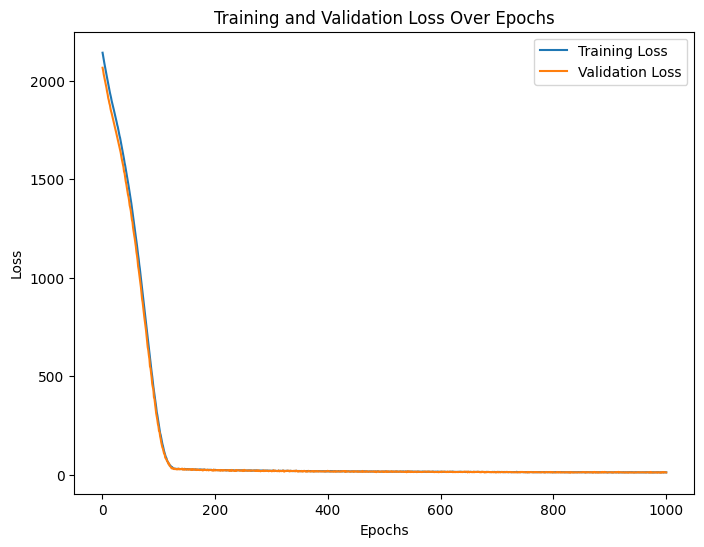

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    # No need for thresholding for regression task
    y_test_predicted = test_outputs.numpy().flatten()
    y_test_numpy = y_test_tensor.numpy().flatten()

# Calculate the mean squared error
mse = mean_squared_error(y_test_numpy, y_test_predicted)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 10.04149055480957
